# Kings County Real Estate Firm Recommendation Project

### FIRM: Seattle Rental Group / Pointe3 - Condo and home leasing service as well as sell/purchase group

In this notebook, we will be exploring the Kings County real estate sales data to identify key features that drive prices up in housing sales in order to maximize the market value of a home to sell for the highest profit margin. In identifying these key features, we can recommend to remodel houses, multifamily units, to increase their value and rent/sell at higher prices.

What does our stakeholder want ???????????????
- include what we need only initially 
- add as we go in order to make it more valuable 


In [119]:
!ls data


column_names.md
kc_house_data.csv


In [120]:
import pandas as pd
import numpy as np
from numbers import Number
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
#from sklearn.feature_selection import RFE
#from sklearn.preprocessing import PolynomialFeatures, StandardScaler
#from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### The data

- The data is relevant for our analysis because we are focusing in the King's County area and this set has information about housing sales in King's County. Below we can see the data set includes 21,597 records and of 21 features of information

In [121]:
df = pd.read_csv('data/kc_house_data.csv')
df.shape

(21597, 21)

In [122]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

#### We will be filtering out the columns by relevancy down to 12 columns total.

In [123]:
df = df[['price', 'id', 'sqft_living', 'grade', 'bathrooms', 'bedrooms', 'waterfront', 'floors', 'sqft_lot', 'yr_built', 'condition', 'date']]

In [124]:
df.describe()

,price,id,sqft_living,grade,bathrooms,bedrooms,waterfront,floors,sqft_lot,yr_built,condition
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,19221.000000,21597.000000,2.159700e+04,21597.000000,21597.000000
mean,5.402966e+05,4.580474e+09,2080.321850,7.657915,2.115826,3.373200,0.007596,1.494096,1.509941e+04,1970.999676,3.409825
std,3.673681e+05,2.876736e+09,918.106125,1.173200,0.768984,0.926299,0.086825,0.539683,4.141264e+04,29.375234,0.650546
min,7.800000e+04,1.000102e+06,370.000000,3.000000,0.500000,1.000000,0.000000,1.000000,5.200000e+02,1900.000000,1.000000
25%,3.220000e+05,2.123049e+09,1430.000000,7.000000,1.750000,3.000000,0.000000,1.000000,5.040000e+03,1951.000000,3.000000
50%,4.500000e+05,3.904930e+09,1910.000000,7.000000,2.250000,3.000000,0.000000,1.500000,7.618000e+03,1975.000000,3.000000
75%,6.450000e+05,7.308900e+09,2550.000000,8.000000,2.500000,4.000000,0.000000,2.000000,1.068500e+04,1997.000000,4.000000
max,7.700000e+06,9.900000e+09,13540.000000,13.000000,8.000000,33.000000,1.000000,3.500000,1.651359e+06,2015.000000,5.000000


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   id           21597 non-null  int64  
 2   sqft_living  21597 non-null  int64  
 3   grade        21597 non-null  int64  
 4   bathrooms    21597 non-null  float64
 5   bedrooms     21597 non-null  int64  
 6   waterfront   19221 non-null  float64
 7   floors       21597 non-null  float64
 8   sqft_lot     21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
 10  condition    21597 non-null  int64  
 11  date         21597 non-null  object 
dtypes: float64(4), int64(7), object(1)
memory usage: 2.0+ MB


In [126]:
dont_need = ['view', 
             'sqft_above',
             'sqft_basement',
             'yr_renovated',
             'zipcode',
             'lat',
             'long',
             'sqft_living15',
             'sqft_lot15']

#### Changing date to datetime

In [127]:
df['date'] = pd.to_datetime(df['date'])

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   price        21597 non-null  float64       
 1   id           21597 non-null  int64         
 2   sqft_living  21597 non-null  int64         
 3   grade        21597 non-null  int64         
 4   bathrooms    21597 non-null  float64       
 5   bedrooms     21597 non-null  int64         
 6   waterfront   19221 non-null  float64       
 7   floors       21597 non-null  float64       
 8   sqft_lot     21597 non-null  int64         
 9   yr_built     21597 non-null  int64         
 10  condition    21597 non-null  int64         
 11  date         21597 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(7)
memory usage: 2.0 MB


#### Filling in the nan's in waterfront to 0 as it most likely means the building isn't a waterfront property.

In [129]:
df.isna().sum()

price             0
id                0
sqft_living       0
grade             0
bathrooms         0
bedrooms          0
waterfront     2376
floors            0
sqft_lot          0
yr_built          0
condition         0
date              0
dtype: int64

In [130]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [131]:
df['waterfront'].fillna(0, inplace=True)

In [132]:
df['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

#### Identifying and converting categorical variables

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   price        21597 non-null  float64       
 1   id           21597 non-null  int64         
 2   sqft_living  21597 non-null  int64         
 3   grade        21597 non-null  int64         
 4   bathrooms    21597 non-null  float64       
 5   bedrooms     21597 non-null  int64         
 6   waterfront   21597 non-null  float64       
 7   floors       21597 non-null  float64       
 8   sqft_lot     21597 non-null  int64         
 9   yr_built     21597 non-null  int64         
 10  condition    21597 non-null  int64         
 11  date         21597 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(7)
memory usage: 2.0 MB


In [134]:
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:10])
    except:
        print(col, df[col].value_counts())

price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64
id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
3969300030    2
2560801222    2
3883800011    2
2228900270    2
251300110     2
Name: id, dtype: int64
sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
1800    129
1820    128
1480    125
1720    125
1540    124
Name: sqft_living, dtype: int64
grade 7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
Name: grade, dtype: int64
bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.7

In [135]:
df.nunique()

price           3622
id             21420
sqft_living     1034
grade             11
bathrooms         29
bedrooms          12
waterfront         2
floors             6
sqft_lot        9776
yr_built         116
condition          5
date             372
dtype: int64

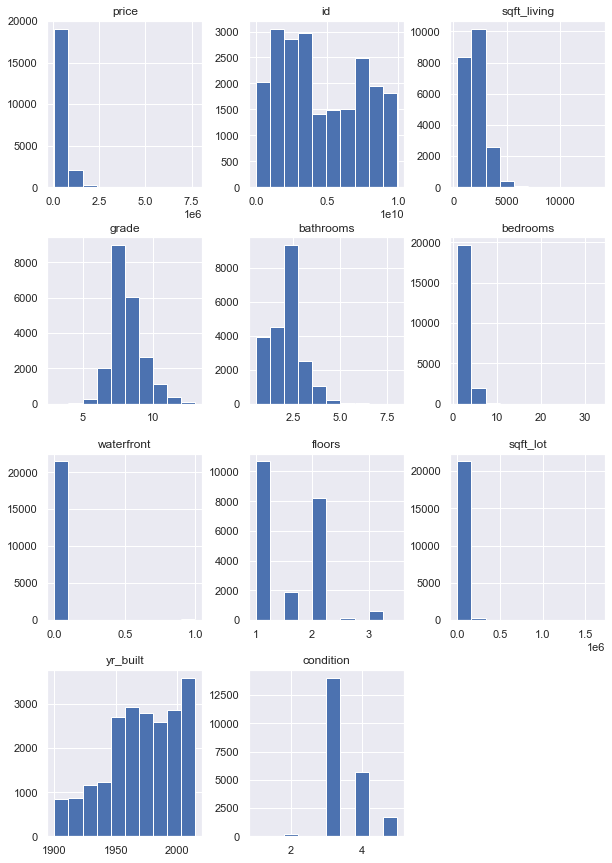

In [136]:
fig = plt.figure(figsize = (10,15))
ax = fig.gca()
df.hist(ax=ax);

In [137]:
df['grade'] = df['grade'].astype('float32')
df['grade'] = df['grade'].astype('str')

In [138]:
df['grade'].value_counts()

7.0     8974
8.0     6065
9.0     2615
6.0     2038
10.0    1134
11.0     399
5.0      242
12.0      89
4.0       27
13.0      13
3.0        1
Name: grade, dtype: int64

In [104]:
df['bedrooms'] = df['bedrooms'].astype('float32')
df['bedrooms'] = df['bedrooms'].astype('str')

In [105]:
df['floors'] = df['floors'].astype('float32')
df['floors'] = df['floors'].astype('str')

In [106]:
df['condition'] = df['condition'].astype('float32')
df['condition'] = df['condition'].astype('str')

In [139]:
from sklearn.preprocessing import OneHotEncoder

In [140]:
grade_ohe = df[['grade']]
ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')
ohe.fit(grade_ohe)
ohe.categories

'auto'

In [141]:
grade_encoded = ohe.transform(grade_ohe)
grade_encoded[2]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [142]:
for category in ohe.categories_:
    ohe.categories_[0] = category + '_gr'

In [143]:
grade_encoded = pd.DataFrame(grade_encoded, columns=ohe.categories_, index=df.index)
grade_encoded

,10.0_gr,11.0_gr,12.0_gr,13.0_gr,3.0_gr,4.0_gr,5.0_gr,6.0_gr,7.0_gr,8.0_gr,9.0_gr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [144]:
df.drop('grade', axis=1, inplace=True)

In [145]:
df = pd.concat([df, grade_encoded], axis=1)

In [146]:
df['bathrooms'] = df['bathrooms'].astype('float32')
df['bathrooms'] = df['bathrooms'].astype('str')

In [115]:
bathroom_ohe = df[['bathrooms']]
ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')
ohe.fit(bathroom_ohe)
ohe.categories

'auto'

In [116]:
bathroom_encoded = ohe.transform(bathroom_ohe)

In [117]:
for category in ohe.categories_:
    ohe.categories_[0] = category + '_bath'

In [118]:
bathroom_encoded = pd.DataFrame(bathroom_encoded, columns=ohe.categories_, index=df.index)
bathroom_encoded

,0.5_bath,0.75_bath,1.0_bath,1.25_bath,1.5_bath,1.75_bath,2.0_bath,2.25_bath,2.5_bath,2.75_bath,...,5.25_bath,5.5_bath,5.75_bath,6.0_bath,6.25_bath,6.5_bath,6.75_bath,7.5_bath,7.75_bath,8.0_bath
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#pd.plotting.scatter_matrix(df)

In [ ]:
#####################sns.pairplot(df)

In [ ]:
df.corr()

<AxesSubplot:>

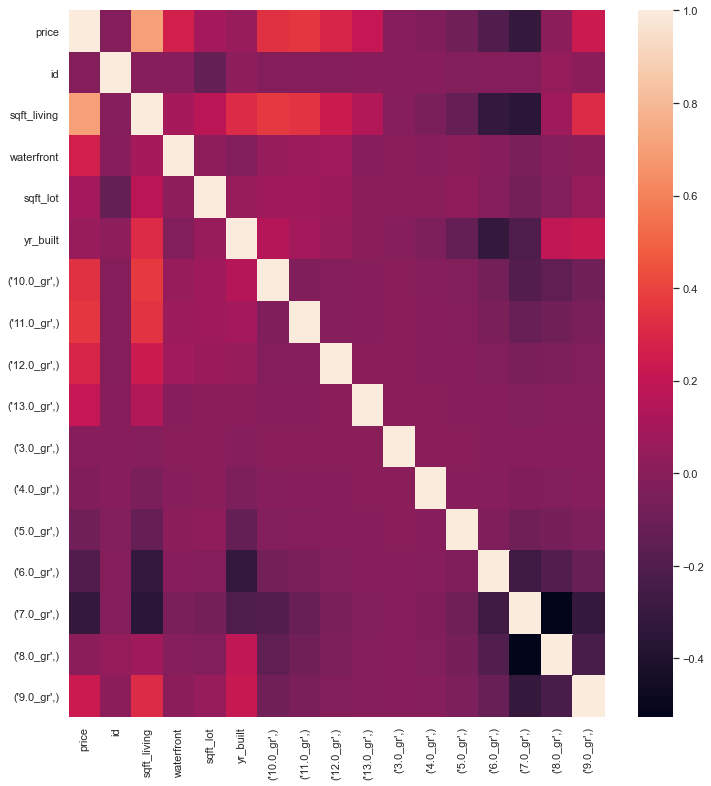

In [91]:
sns.set(rc={'figure.figsize':(12, 13)})
sns.heatmap(df.corr())

In [ ]:
sns.heatmap(df.corr(), center=0);

In [ ]:
price_corr = df.corr()['price'].map(abs).sort_values(ascending=False)

In [ ]:
price_corr

In [ ]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df_corr=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

# set index to pairs
df_corr.set_index(['pairs'], inplace = True)

#d rop level columns
df_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_corr.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_corr.drop_duplicates(inplace=True)

In [ ]:
#df_corr = df[(df_corr>.75) & (df_corr <1)]
df_corr

In [ ]:
FSM_df = df[['price', 'sqft_living', 'bathrooms', 'bedrooms']]
price_target = df['price']


In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(price_preds, price_target)

In [ ]:
lr.score(price_preds, price_target)

### First Simple Model

In [ ]:
formula = 'price ~ sqft_living'

In [ ]:
fsm = ols(formula, FSM_df).fit()

In [ ]:
fsm_summary = fsm.summary()

In [ ]:
fsm_summary

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(fsm, "sqft_living", fig=fig)
plt.show()

In [ ]:
residuals = fsm.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [ ]:
y = df['price']
x = df.drop('price', axis=1)

In [ ]:
model = LinearRegression()